In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import urllib
from sklearn.model_selection import train_test_split
import os
import numpy as np
from operator import itemgetter
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
# requirements : 
#     recommended platform : ubuntu
#     python == 3.7
#     pip install pandas
#     pip install numpy
#     pip install sklearn
#     pip install seaborn
#     pip install matplotlib
%matplotlib inline

In [3]:
if not os.path.exists('./Skin_NonSkin.txt'):
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt'
    urllib.request.urlretrieve(url,'./Skin_NonSkin.txt')

In [4]:
df = pd.read_csv('Skin_NonSkin.txt', sep='\t',names =['B','G','R','skin'])
df.head()

,B,G,R,skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [5]:
# NO MISSING VALUES
df.isna().sum()

B       0
G       0
R       0
skin    0
dtype: int64

In [6]:
feature = df[df.columns[~df.columns.isin(['skin'])]] #Except Label
label = (df[['skin']] == 1)*1 #Converting to 0 and 1 (this col has values 1 and 2)
feature = feature / 255. #Pixel values range from 0-255 converting between 0-1

In [7]:
feature.head()

,B,G,R
0,0.290196,0.333333,0.482353
1,0.286275,0.329412,0.478431
2,0.282353,0.325490,0.474510
3,0.274510,0.317647,0.466667
4,0.274510,0.317647,0.466667


In [8]:
label.head()

,skin
0,1
1,1
2,1
3,1
4,1


In [9]:
alldf = pd.concat([feature,label], sort=True, axis=1)
alldf

,B,G,R,skin
0,0.290196,0.333333,0.482353,1
1,0.286275,0.329412,0.478431,1
2,0.282353,0.325490,0.474510,1
3,0.274510,0.317647,0.466667,1
4,0.274510,0.317647,0.466667,1
...,...,...,...,...
245052,0.639216,0.635294,0.439216,0
245053,0.639216,0.635294,0.439216,0
245054,0.639216,0.635294,0.439216,0
245055,0.639216,0.635294,0.439216,0


In [10]:
sample = alldf.sample(1000)

In [11]:
onlybgr = sample[sample.columns[~sample.columns.isin(['skin'])]]

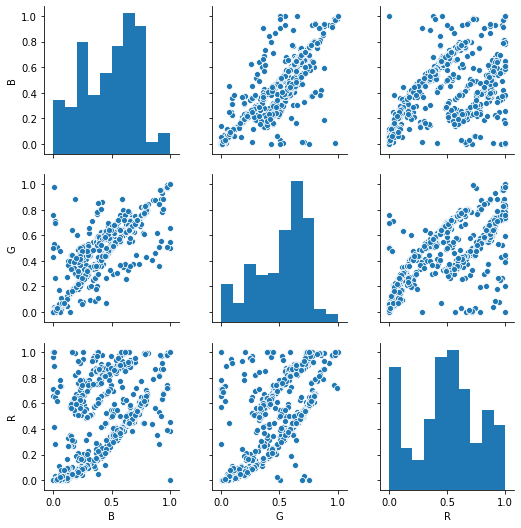

In [12]:
sns.pairplot(onlybgr)

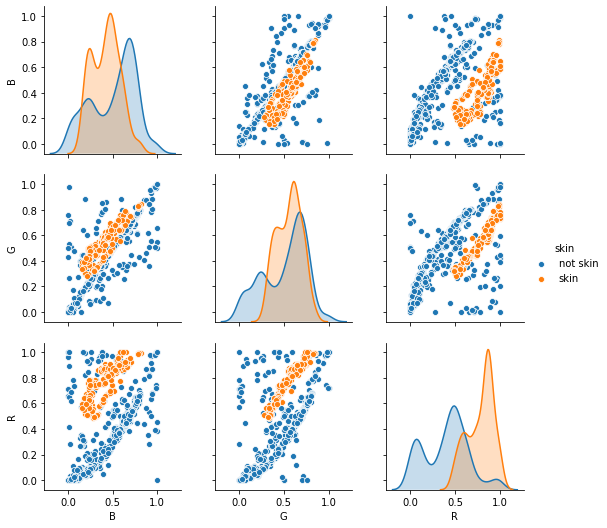

In [13]:
sample_ = sample.copy()
sample_['skin'] = sample.skin.apply(lambda x:{1:'skin',0:'not skin'}.get(x))
sns.pairplot(sample_, hue="skin")
# sample

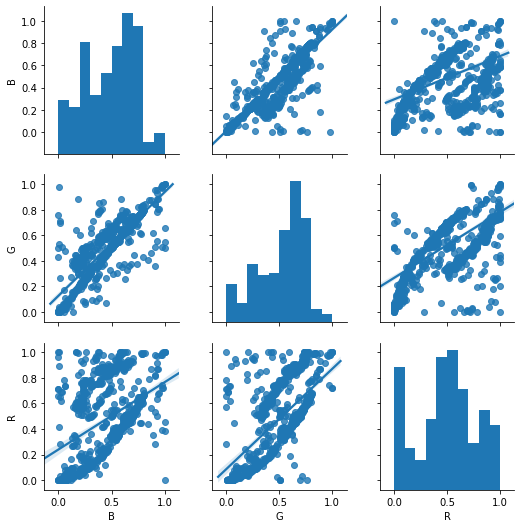

In [14]:
sns.pairplot(onlybgr, kind="reg")

In [15]:
# Lets see how many 0s and 1s
(label == 0).skin.sum(),(label == 1).skin.sum()

(194198, 50859)

In [16]:
x = feature.values
y = label.values

In [17]:
# We will keep fix test and take 5 cross validation set
# so we will have five different data set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=1)

In [18]:
#Lets see the size of xtrain, xtest
len(xtrain),len(xtest)

(196045, 49012)

In [19]:
# 5 Fold Split
# First merge xtrain and ytrain so that we can easily divide into 5 chunks

data = np.concatenate([xtrain,ytrain],axis = 1)
# Observe the shape of array
xtrain.shape,ytrain.shape,data.shape

((196045, 3), (196045, 1), (196045, 4))

In [20]:
# Divide our data to 5 chunks
chunks = np.split(data,5)

In [21]:
datadict = {'fold1':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},
            'fold2':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},
            'fold3':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}}, 
            'fold4':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},
            'fold5':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},}

In [22]:
for i in range(5):
    datadict['fold'+str(i+1)]['val']['x'] = chunks[i][:,0:3]
    datadict['fold'+str(i+1)]['val']['y'] = chunks[i][:,3:4]
    
    idx = list(set(range(5))-set([i]))
    X = np.concatenate(itemgetter(*idx)(chunks),0)
    datadict['fold'+str(i+1)]['train']['x'] = X[:,0:3]
    datadict['fold'+str(i+1)]['train']['y'] = X[:,3:4]

In [23]:
def writepickle(data, filename):
    with open(filename, 'wb') as f:
        pickle.dump(data, f)

def readpickle(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

In [24]:
writepickle(datadict,'data.pkl')

In [25]:
data = readpickle('data.pkl')

In [26]:
#fold1 data
fold1 = data['fold1']
fold1_train = fold1['train']
fold1_val = fold1['val']
fold1_test = fold1['test']

f1_xtrain, f1_ytrain = fold1_train['x'],fold1_train['y']
f1_xval, f1_yval = fold1_val['x'], fold1_val['y']
f1_xtest, f1_ytest = fold1_test['x'],fold1_test['y']

#fold2 data
fold2 = data['fold2']
fold2_train = fold2['train']
fold2_val = fold2['val']
fold2_test = fold2['test']

f2_xtrain, f2_ytrain = fold2_train['x'],fold2_train['y']
f2_xval, f2_yval = fold2_val['x'], fold2_val['y']
f2_xtest, f2_ytest = fold2_test['x'],fold2_test['y']

#fold3 data
fold3 = data['fold3']
fold3_train = fold3['train']
fold3_val = fold3['val']
fold3_test = fold3['test']

f3_xtrain, f3_ytrain = fold3_train['x'],fold3_train['y']
f3_xval, f3_yval = fold3_val['x'], fold3_val['y']
f3_xtest, f3_ytest = fold3_test['x'],fold3_test['y']

#fold4 data
fold4 = data['fold4']
fold4_train = fold4['train']
fold4_val = fold4['val']
fold4_test = fold4['test']

f4_xtrain, f4_ytrain = fold4_train['x'],fold4_train['y']
f4_xval, f4_yval = fold4_val['x'], fold4_val['y']
f4_xtest, f4_ytest = fold4_test['x'],fold4_test['y']

#fold5 data
fold5 = data['fold5']
fold5_train = fold5['train']
fold5_val = fold5['val']
fold5_test = fold5['test']

f5_xtrain, f5_ytrain = fold5_train['x'],fold5_train['y']
f5_xval, f5_yval = fold5_val['x'], fold5_val['y']
f5_xtest, f5_ytest = fold5_test['x'],fold5_test['y']

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logisticRegr = LogisticRegression()

In [29]:
logisticRegr.fit(f1_xtrain, f1_ytrain.ravel())

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
f1_valScore = logisticRegr.score(f1_xval, f1_yval)
f1_testScore = logisticRegr.score(f1_xtest, f1_ytest)
print(f1_valScore, f1_testScore)

0.9189216761457829 0.9189178160450502


In [43]:
logisticRegr.fit(f2_xtrain, f2_ytrain.ravel())

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
f2_valScore = logisticRegr.score(f2_xval, f2_yval)
f2_testScore = logisticRegr.score(f2_xtest, f2_ytest)
print(f2_valScore, f2_testScore)

0.9177229717666863 0.9188974128784787


In [45]:
logisticRegr.fit(f3_xtrain, f3_ytrain.ravel())

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
f3_valScore = logisticRegr.score(f3_xval, f3_yval)
f3_testScore = logisticRegr.score(f3_xtest, f3_ytest)
print(f3_valScore, f3_testScore)

0.9197123109490168 0.9187341875459071


In [47]:
logisticRegr.fit(f4_xtrain, f4_ytrain.ravel())

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
f4_valScore = logisticRegr.score(f4_xval, f4_yval)
f4_testScore = logisticRegr.score(f4_xtest, f4_ytest)
print(f4_valScore, f4_testScore)

0.9184370935244459 0.9193462825430507


In [50]:
logisticRegr.fit(f5_xtrain, f5_ytrain.ravel())

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
f5_valScore = logisticRegr.score(f4_xval, f4_yval)
f5_testScore = logisticRegr.score(f4_xtest, f4_ytest)
print(f5_valScore, f5_testScore)

0.9182075543880232 0.9189178160450502


In [52]:
data = {'Val':[f1_valScore, f2_valScore, f3_valScore, f4_valScore, f5_valScore],
        'Test':[f1_testScore, f2_testScore, f3_testScore, f4_testScore, f5_testScore]}

In [53]:
df = pd.DataFrame(data)

In [54]:
print(df)

        Val      Test
0  0.918922  0.918918
1  0.917723  0.918897
2  0.919712  0.918734
3  0.918437  0.919346
4  0.918208  0.918918
